In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import scipy.stats as st

## Corrélation sans les clients bussiness
### Variable quali / quali
###  

In [3]:
sns.set( 
    style='whitegrid',
    context='notebook',
    palette=['#c2a87c','#423217','#8F7C5B','#423A2A','#CC9B45'],
    rc={'figure.figsize':(14,6),'axes.facecolor':'grey', 'figure.facecolor':'grey'})

In [4]:
t_b2b= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2b.csv',index_col='date')
t_b2c= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2c.csv',index_col='date')
global_t= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t.csv',index_col='date')
global_t_client= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t_client.csv')

In [5]:
business =['c_1609','c_6714','c_3454','c_4958']
transactions_b2c= global_t[~global_t['client_id'].isin(business)]
transactions_b2c.head(2)

session_id  month  month_part  weekday  hour  \
date                                                                      
2021-03-22 01:40:22.782925     s_9707      3           2        0     1   
2023-02-22 01:40:22.782925   s_345108      2           2        2     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ  
date                                           
2021-03-22 01:40:22.782925           L    1.0  
2023-02-22 01:40:22.782925           L    1.0

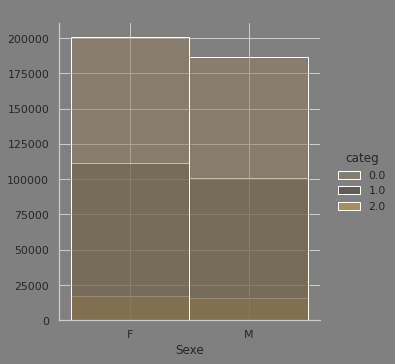

In [6]:
sns.displot(data=transactions_b2c, x='sex', hue='categ',palette=['#8F7C5B','#423A2A','#CC9B45'])
plt.title(' ')
plt.xlabel('Sexe') # axes
plt.ylabel('') # axes
plt.xticks([0, 1,], ['F', 'M'])
plt.savefig('Sexe & catégorie', dpi=300, bbox_inches='tight')
plt.show()

Les deux variables sont-elles indépendantes?

 H0: les deux variables sont indépendantes.
 
 H1: les deux variables ne sont pas idépendantes

In [7]:
# Tableau de contingence
X = 'sex'
Y = 'categ'

cont = transactions_b2c.pivot_table(index = X, columns = Y, values = 'price', aggfunc = sum, margins = True, margins_name = 'Total')
cont

categ           0.0         1.0         2.0         Total
sex                                                      
f      2.133939e+06  2285170.48  1288155.25  5.707265e+06
m      1.987517e+06  2064262.51  1215909.21  5.267688e+06
Total  4.121456e+06  4349432.99  2504064.46  1.097495e+07

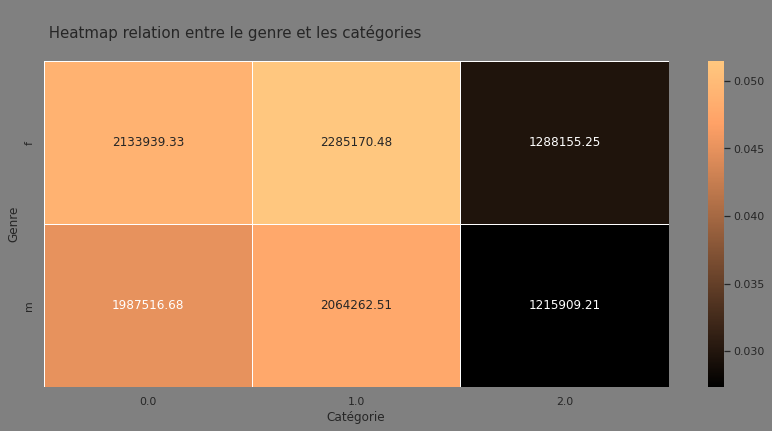

In [8]:
# Tableau de contingence avec coloration
tx = cont.loc[:,['Total']]
ty = cont.loc[['Total'],:]
n = len(transactions_b2c)
indep = tx.dot(ty)/n


c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1], annot = c.iloc[:-1,:-1], cmap = 'copper',fmt='.2f', linewidths=.5)
plt.title('\n Heatmap relation entre le genre et les catégories \n', fontsize = 15, loc = 'left')
plt.xlabel('Catégorie')
plt.ylabel('Genre')
plt.savefig('Heatmap Sexe & catégorie', dpi=300, bbox_inches='tight')

plt.show()

In [9]:
cont2 = cont.drop(index = 'Total', columns = 'Total')
cont2

categ           0.0         1.0         2.0
sex                                        
f      2.133939e+06  2285170.48  1288155.25
m      1.987517e+06  2064262.51  1215909.21

In [10]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(cont2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=901.491, p=0.000
Probably dependent


### Test de normalité : Shapiro-Wilk

In [11]:
from scipy.stats import shapiro
from scipy import stats

alpha = 0.05

a,b=stats.shapiro(global_t_client.ca_client.sample(5000))
print("Statistics",a,"p-value",b)
if b< alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


Statistics 0.05065274238586426 p-value 0.0
The null hypothesis can be rejected
